# SC1015 Mini Project - Income Inequality 
This is a SC1015 Introduction to Data Science and Artificial Intelligence mini project which address income inequality. 

## Problem Definiition
Income inequality, which is defined as the extent to which income is distributed in an uneven manner among a population, has been a highly discussed topic in America. This is especially so in relation to rising concerns of Racism, Sexism and Ageism, where certain races, genders and people above a certain age, are said to be unfairly paid less for the same amount of work.

As such, we would like to investigate the state of income inequality and to provide a tool that helps job seekers to determine the fair compensation they should be receiving, in an attempt to alleviate the problem. 


## Project Goals
1. Explore the extent of wage discrimination based on age, gender and race in United States.
2. Develop a model that recommends wages based on modifiable factors, such as education, experience, industry and occupation and ignores non-modifiable factors such as age, gender and race. 

In [ ]:
import requests 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

# 1. Sample Collection and Data Preparation



In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/dsai_mini_project

CPS_data.csv  CurrentPopulationSurvey.csv


In [ ]:
#df = pd.read_csv("/content/gdrive/MyDrive/dsai_mini_project/CPS_data.csv")
df = pd.read_csv("CPS_data.csv")
pd.set_option('display.max_columns', None)

In [ ]:
clean_df = df[["year","serial","numprec","region","statefip","metro","metarea","month","pernum","relate","age","sex","race","marst","popstat","sch","empstat","union","uhrswork","occ1990","ind","classwkr","wkswork1","hrswork","incwage","ftype","potexp","annhrs","realhrwage"]]

In [ ]:
clean_df.head()

,year,serial,numprec,region,statefip,metro,metarea,month,pernum,relate,age,sex,race,marst,popstat,sch,empstat,union,uhrswork,occ1990,ind,classwkr,wkswork1,hrswork,incwage,ftype,potexp,annhrs,realhrwage
0,1990,9677,1,12,36,2.0,5607.0,3,1,101,58,1,3,6,1,12.0,10,0.0,35,335,871,28,52,35.0,14200.0,2,40,1820,12.269874
1,2009,64923,4,33,5,2.0,NaN,3,4,1260,28,1,1,6,1,12.0,10,1.0,40,337,8660,21,52,40.0,17680.0,5,10,2080,8.635149
2,1990,8425,1,12,36,3.0,5607.0,3,1,101,37,1,1,6,1,14.0,10,1.0,40,217,380,21,52,40.0,28000.0,2,17,2080,21.169851
3,1990,67963,1,42,6,3.0,7400.0,3,1,101,34,1,1,6,1,18.0,10,1.0,45,64,740,21,47,50.0,27500.0,2,10,2115,20.447746
4,1981,38650,9,31,51,3.0,8840.0,3,1,101,38,1,4,1,1,13.0,10,NaN,40,22,798,10,52,80.0,17000.0,1,19,2080,18.892282


In [ ]:
clean_df.describe()

,year,serial,numprec,region,statefip,metro,metarea,month,pernum,relate,age,sex,race,marst,popstat,sch,empstat,union,uhrswork,occ1990,ind,classwkr,wkswork1,hrswork,incwage,ftype,potexp,annhrs,realhrwage
count,344220.000000,344220.000000,344220.000000,344220.000000,344220.000000,334461.000000,240294.000000,344220.0,344220.000000,344220.000000,344220.000000,344220.000000,344220.000000,344220.000000,344220.0,344220.000000,344220.000000,301844.000000,344220.000000,344220.000000,344220.000000,344220.000000,344220.000000,333669.000000,3.442200e+05,344220.000000,344220.000000,344220.000000,344220.000000
mean,2002.598303,44772.927326,3.225176,27.751798,28.121387,2.500713,4561.036251,3.0,1.535280,208.069711,41.733990,1.489056,1.570019,2.299956,1.0,13.497978,10.061304,0.221495,40.581555,345.511391,4235.626120,22.120005,49.173343,40.138574,3.975179e+04,1.359381,21.863276,2013.572532,21.717461
std,10.831904,26721.841335,1.508159,10.809593,15.818493,0.992363,2525.162328,0.0,0.795774,242.674293,10.415763,0.499881,0.952196,1.965721,0.0,2.799096,0.344746,0.499694,9.810525,249.450147,3468.155981,2.389319,8.129577,11.704348,4.526388e+04,0.906274,10.623456,598.500266,17.467704
min,1981.000000,1.000000,1.000000,11.000000,1.000000,1.000000,80.000000,3.0,1.000000,101.000000,25.000000,1.000000,1.000000,1.000000,1.0,0.000000,10.000000,0.000000,1.000000,3.000000,10.000000,10.000000,1.000000,1.000000,1.500000e+01,1.000000,1.000000,2.000000,2.000000
25%,1990.000000,21979.750000,2.000000,21.000000,13.000000,2.000000,2083.000000,3.0,1.000000,101.000000,33.000000,1.000000,1.000000,1.000000,1.0,12.000000,10.000000,0.000000,40.000000,156.000000,760.000000,21.000000,52.000000,38.000000,1.669500e+04,1.000000,13.000000,1924.000000,11.722334
50%,2007.000000,43297.000000,3.000000,31.000000,28.000000,3.000000,4881.000000,3.0,1.000000,101.000000,41.000000,1.000000,1.000000,1.000000,1.0,13.000000,10.000000,0.000000,40.000000,313.000000,4270.000000,21.000000,52.000000,40.000000,3.000000e+04,1.000000,21.000000,2080.000000,17.692308
75%,2011.000000,66475.000000,4.000000,41.000000,41.000000,3.000000,6483.000000,3.0,2.000000,201.000000,50.000000,2.000000,2.000000,4.000000,1.0,16.000000,10.000000,0.000000,41.000000,479.000000,7860.000000,21.000000,52.000000,45.000000,5.000000e+04,1.000000,30.000000,2080.000000,26.415131
max,2013.000000,98095.000000,16.000000,42.000000,56.000000,4.000000,9360.000000,3.0,15.000000,1260.000000,64.000000,2.000000,4.000000,6.000000,1.0,18.000000,12.000000,3.000000,99.000000,889.000000,9590.000000,29.000000,52.000000,99.000000,1.259999e+06,5.000000,46.000000,5148.000000,498.723145


## Finding NULL and Zero values

In [ ]:
clean_df.isna().sum()

year               0
serial             0
numprec            0
region             0
statefip           0
metro           9759
metarea       103926
month              0
pernum             0
relate             0
age                0
sex                0
race               0
marst              0
popstat            0
sch                0
empstat            0
union          42376
uhrswork           0
occ1990            0
ind                0
classwkr           0
wkswork1           0
hrswork        10551
incwage            0
ftype              0
potexp             0
annhrs             0
realhrwage         0
dtype: int64

In [ ]:
clean_df['metarea'] = clean_df['metarea'].fillna(clean_df['metarea'].median())
clean_df['hrswork'] = clean_df['hrswork'].fillna(clean_df['hrswork'].median())
clean_df['metarea'] = clean_df['metarea'].fillna(clean_df['hrswork'].median())
clean_df['union'] = clean_df['union'].fillna(0)

<ipython-input-9-bc128187dde4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['metarea'] = clean_df['metarea'].fillna(clean_df['metarea'].median())
<ipython-input-9-bc128187dde4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['hrswork'] = clean_df['hrswork'].fillna(clean_df['hrswork'].median())
<ipython-input-9-bc128187dde4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
clean_df.isin([0]).sum()

year               0
serial             0
numprec            0
region             0
statefip           0
metro              0
metarea            0
month              0
pernum             0
relate             0
age                0
sex                0
race               0
marst              0
popstat            0
sch              776
empstat            0
union         288060
uhrswork           0
occ1990            0
ind                0
classwkr           0
wkswork1           0
hrswork            0
incwage            0
ftype              0
potexp             0
annhrs             0
realhrwage         0
dtype: int64

# 2. Exploratory Analysis/Data Visualisation

In [ ]:
race_wage = clean_df[['race', 'realhrwage']]
gender_wage = clean_df[['sex', 'realhrwage']]
age_wage = clean_df[['age', 'realhrwage']]

In [ ]:
gender_wage.head()

,sex,realhrwage
0,1,12.269874
1,1,8.635149
2,1,21.169851
3,1,20.447746
4,1,18.892282


## Analysing Gender vs Wage Relationship

In [ ]:
#Male Data
male_wage = gender_wage[gender_wage['sex'] == 1]
male_wageonly = pd.DataFrame(male_wage['realhrwage'])

#Female Data
female_wage = gender_wage[gender_wage["sex"] == 2]
female_wageonly = pd.DataFrame(female_wage['realhrwage'])

#Combined Data
gender_wageonly = pd.DataFrame(gender_wage['realhrwage'])

### Wage Statistics for Males

In [ ]:
male_wage.describe()

,sex,realhrwage
count,175877.0,175877.000000
mean,1.0,24.665464
std,0.0,18.800614
min,1.0,2.000000
25%,1.0,13.830556
50%,1.0,20.444027
75%,1.0,29.807692
max,1.0,498.723145


### Wage Statistics for Females

In [ ]:
female_wage.describe()

,sex,realhrwage
count,168343.0,168343.000000
mean,2.0,18.637523
std,0.0,15.363944
min,2.0,2.000000
25%,2.0,10.282925
50%,2.0,15.140816
75%,2.0,22.589909
max,2.0,482.552460


##Visualising Wage Statistics for Both Genders

## Univariate Visualisation

### For Male

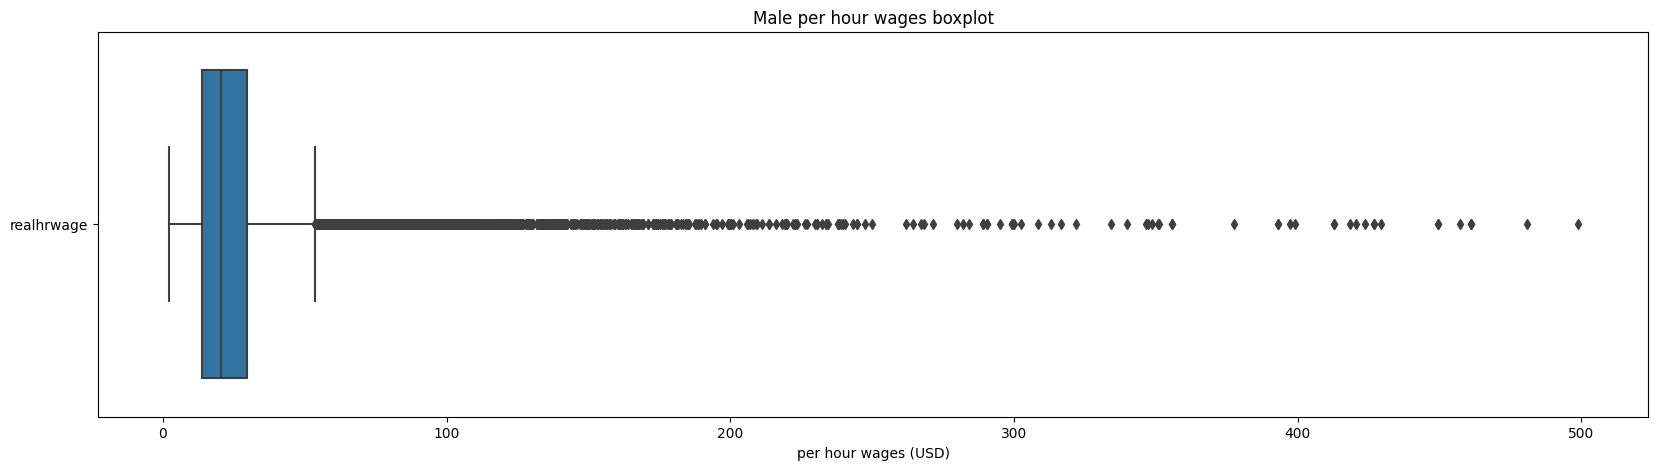

In [ ]:
plt.figure(figsize=(20, 5))
sb.boxplot(data = male_wageonly, orient = "h")
plt.xlabel("per hour wages (USD)")
plt.title("Male per hour wages boxplot")
plt.show()

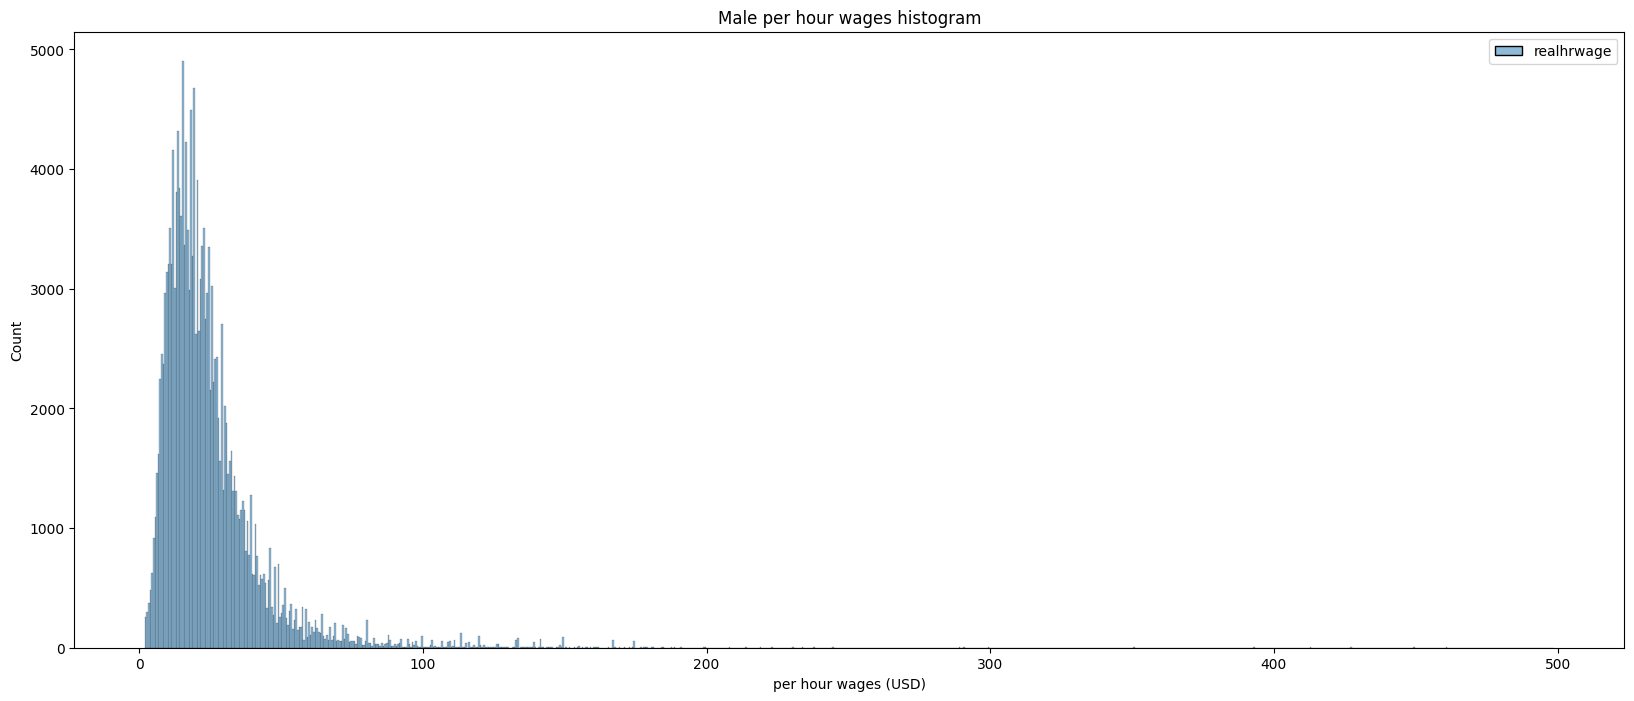

In [ ]:
plt.figure(figsize=(20, 8))
sb.histplot(data = male_wageonly)
plt.xlabel("per hour wages (USD)")
plt.title("Male per hour wages histogram")
plt.show()

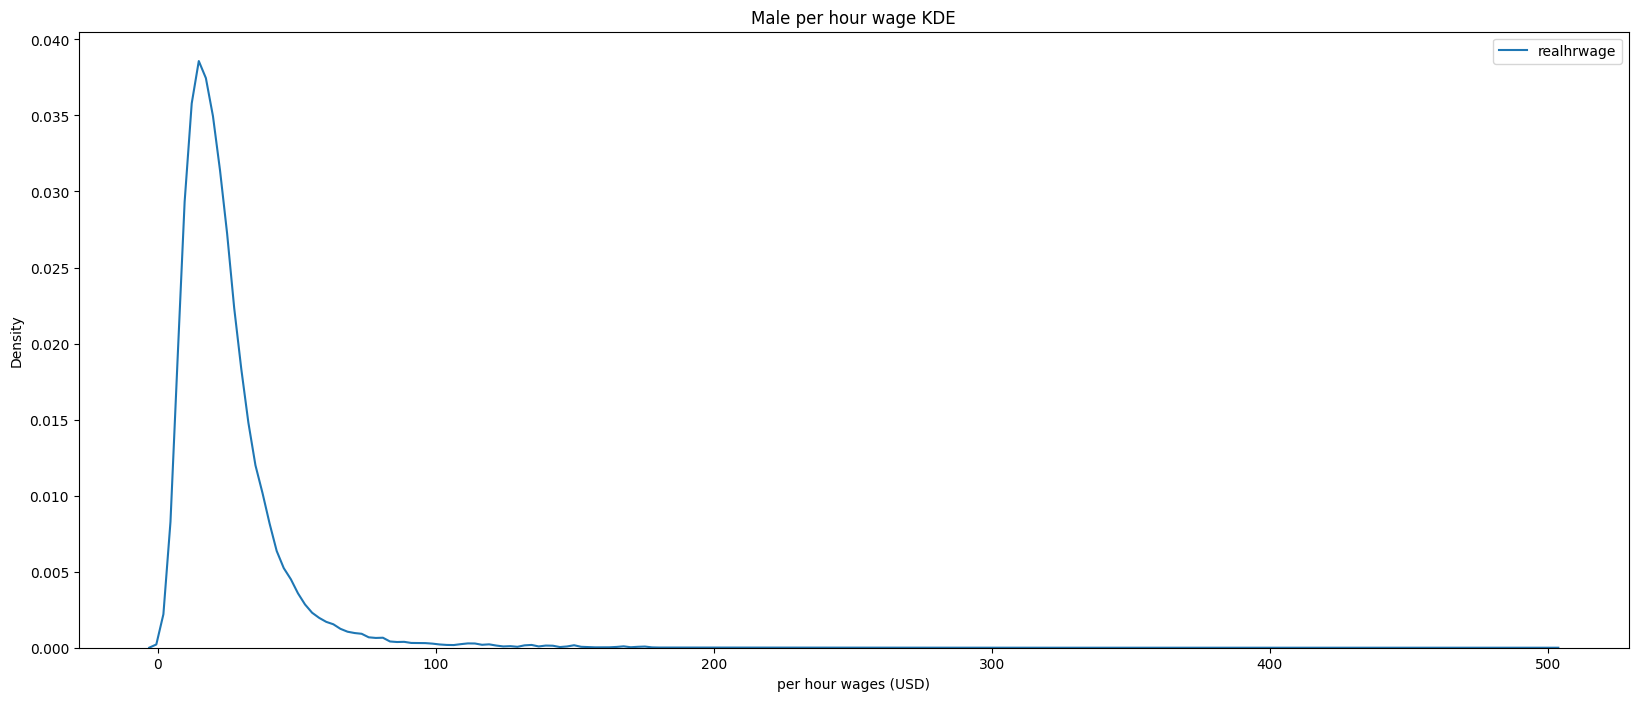

In [ ]:
plt.figure(figsize=(20, 8))
sb.kdeplot(data = male_wageonly)
plt.xlabel("per hour wages (USD)")
plt.title("Male per hour wage KDE")
plt.show()

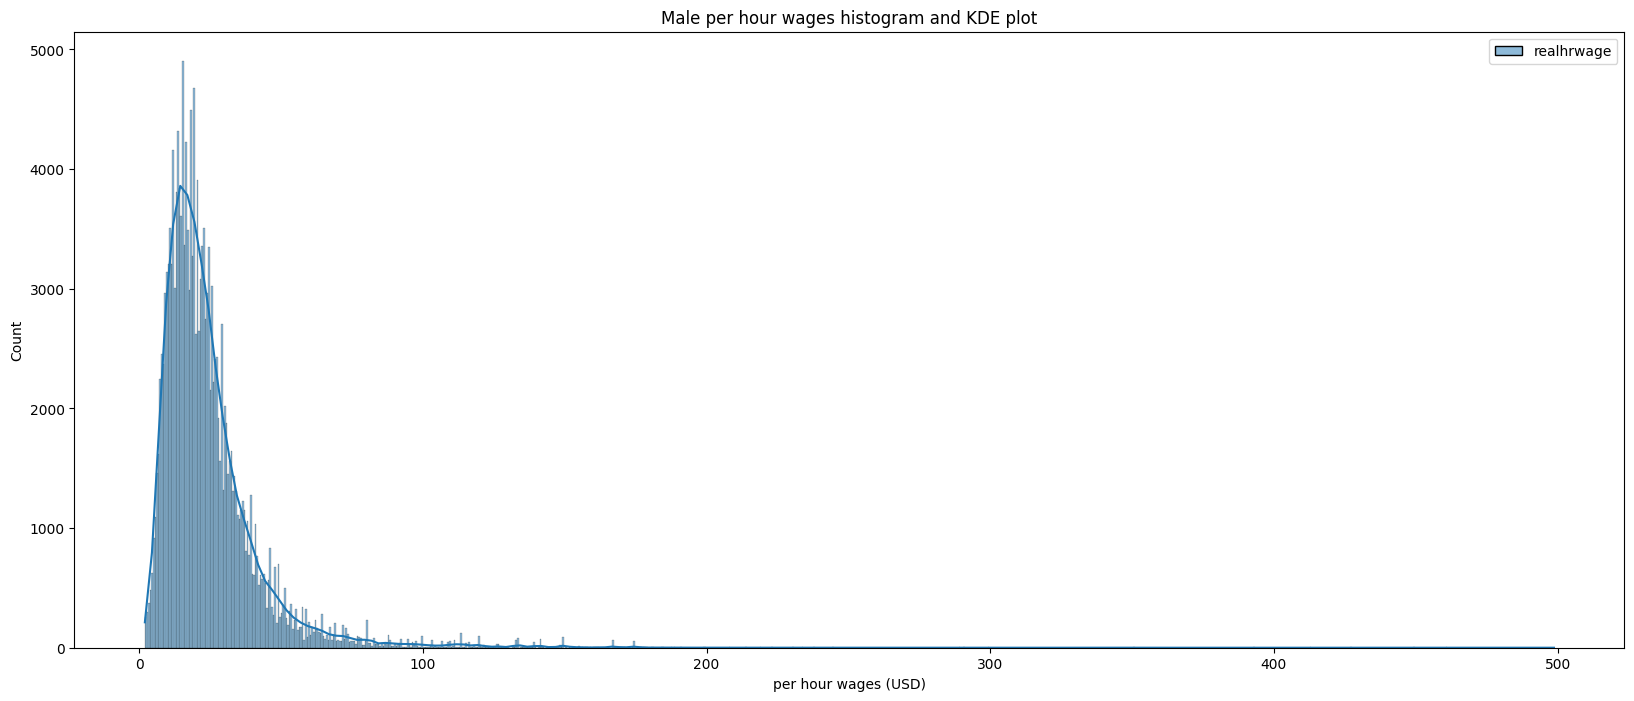

In [ ]:
plt.figure(figsize=(20, 8))
sb.histplot(data = male_wageonly, kde = True)
plt.xlabel("per hour wages (USD)")
plt.title("Male per hour wages histogram and KDE plot")
plt.show()

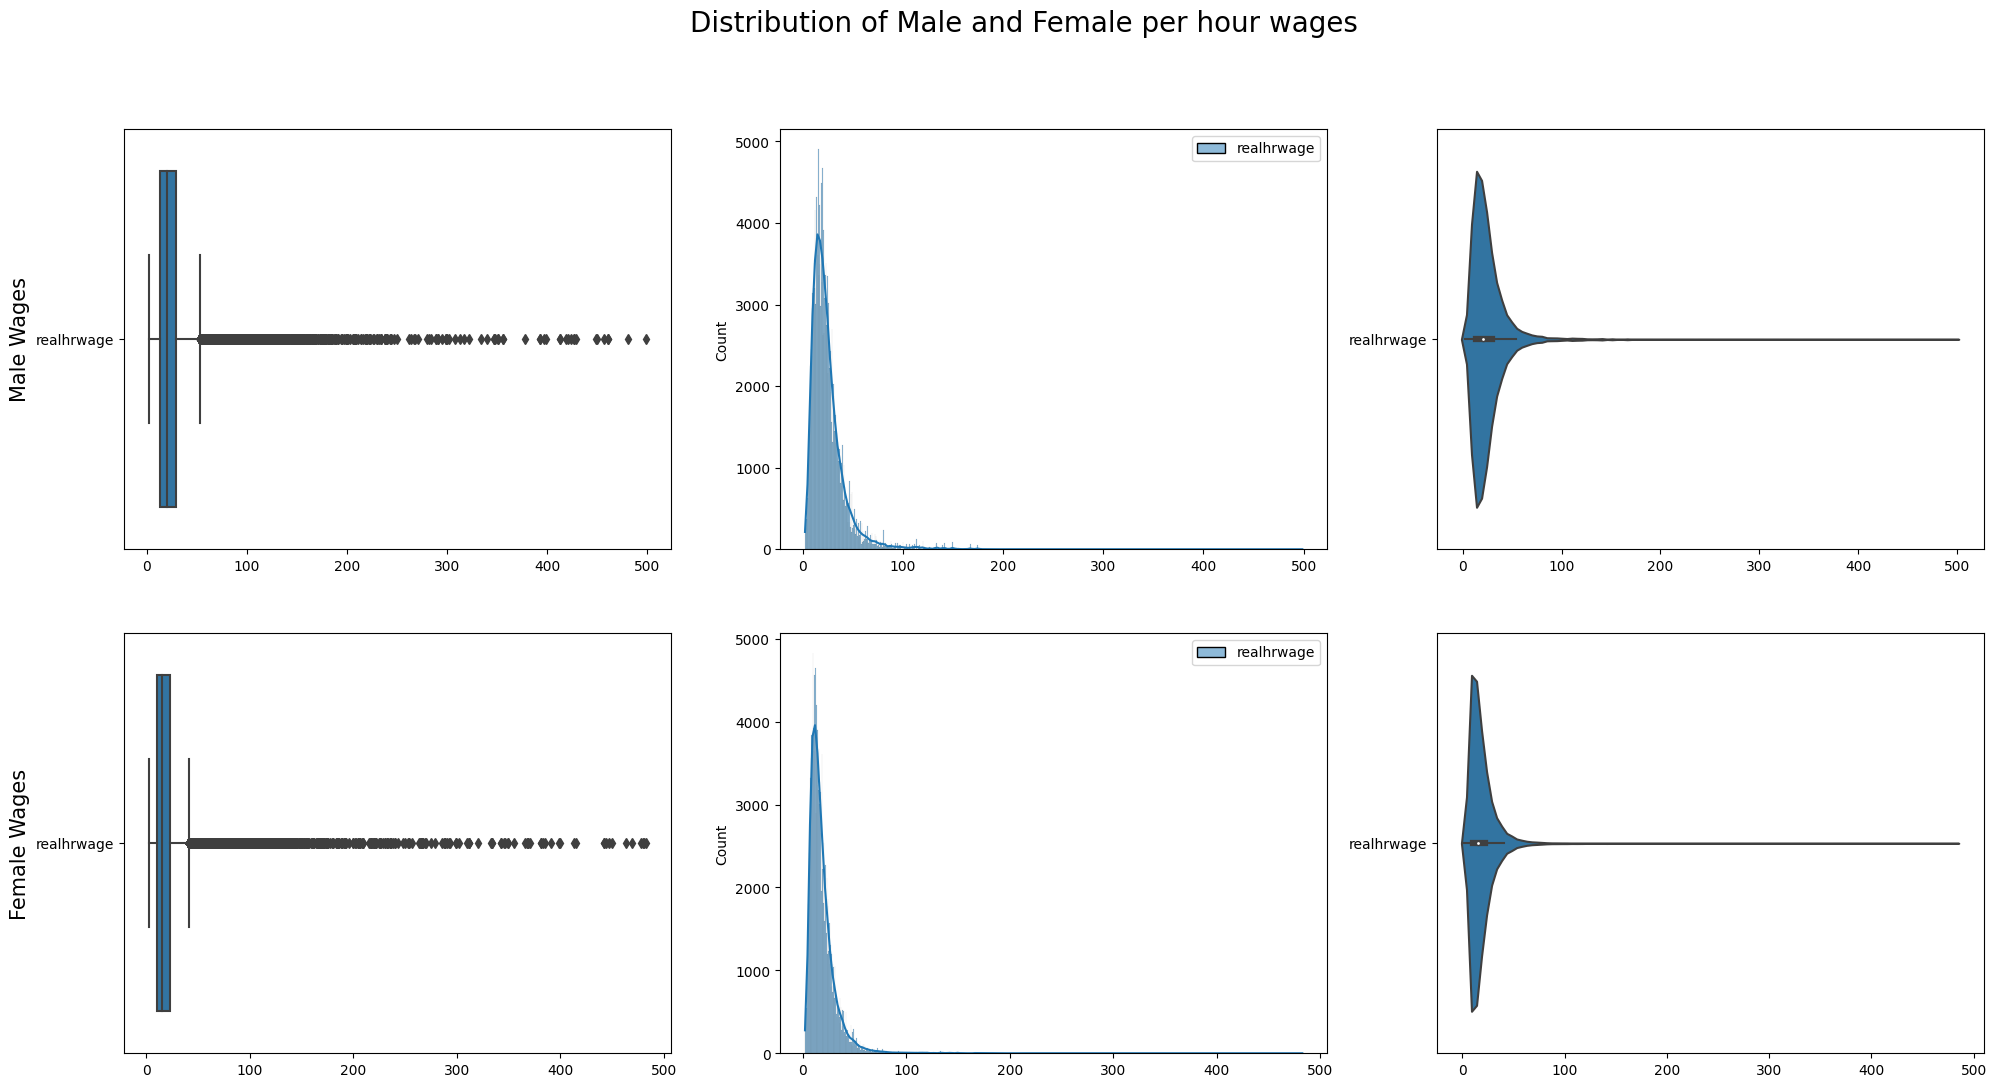

In [ ]:
# Create a new figure and set the figure size
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Male Wages
sb.boxplot(data=male_wageonly, orient="h", ax=axes[0, 0])
sb.histplot(data=male_wageonly, kde=True, ax=axes[0, 1])
sb.violinplot(data=male_wageonly, orient="h", ax=axes[0, 2])

# Plot the basic uni-variate figures for Female Wages
sb.boxplot(data=female_wageonly, orient="h", ax=axes[1, 0])
sb.histplot(data=female_wageonly, kde=True, ax=axes[1, 1])
sb.violinplot(data=female_wageonly, orient="h", ax=axes[1, 2])

# Set Labels
plt.suptitle("Distribution of Male and Female per hour wages", size=20)
axes[0, 0].get_yaxis().set_label_text("Male Wages", size=15)
axes[1, 0].get_yaxis().set_label_text("Female Wages", size=15)

# Show the plot
plt.show()

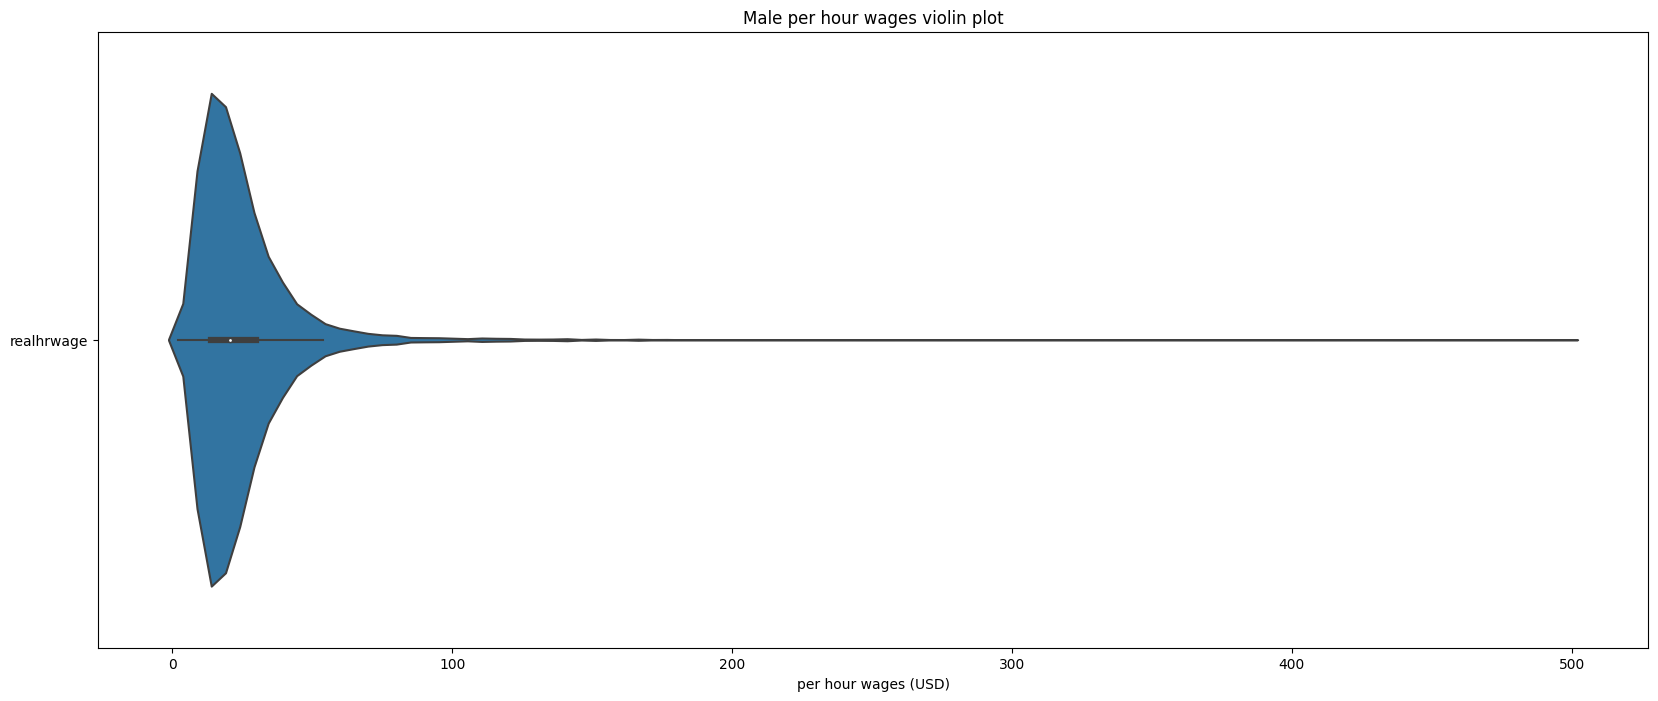

In [ ]:
plt.figure(figsize=(20, 8))
sb.violinplot(data = male_wageonly, orient = "h")
plt.xlabel("per hour wages (USD)")
plt.title("Male per hour wages violin plot")
plt.show()

### For Female

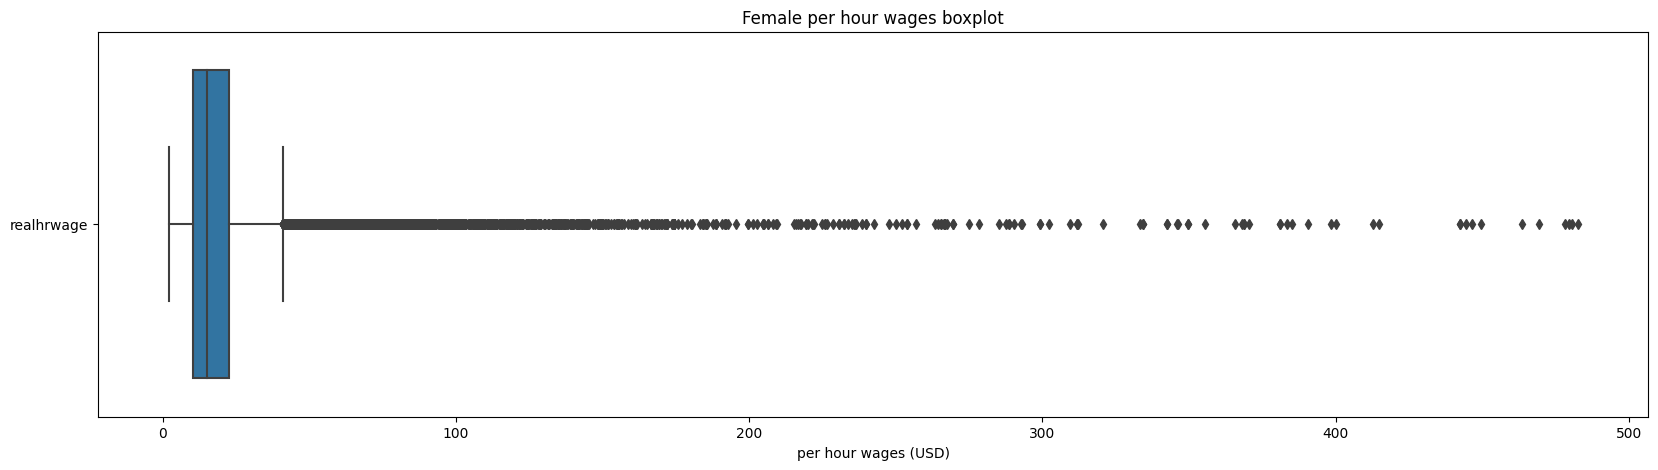

In [ ]:
plt.figure(figsize=(20, 5))
sb.boxplot(data = female_wageonly, orient = "h")
plt.xlabel("per hour wages (USD)")
plt.title("Female per hour wages boxplot")
plt.show()

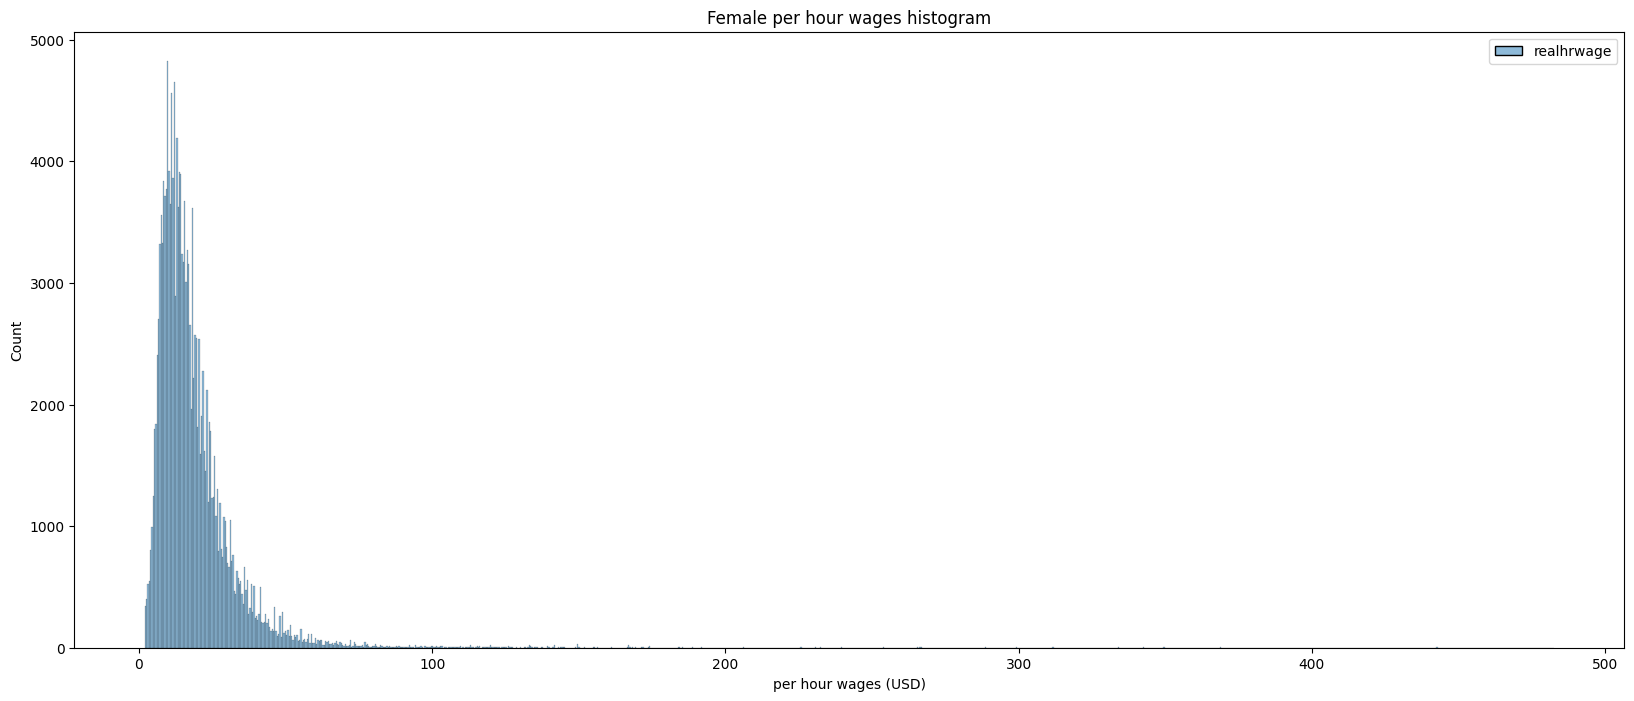

In [ ]:
plt.figure(figsize=(20, 8))
sb.histplot(data = female_wageonly)
plt.xlabel("per hour wages (USD)")
plt.title("Female per hour wages histogram")
plt.show()

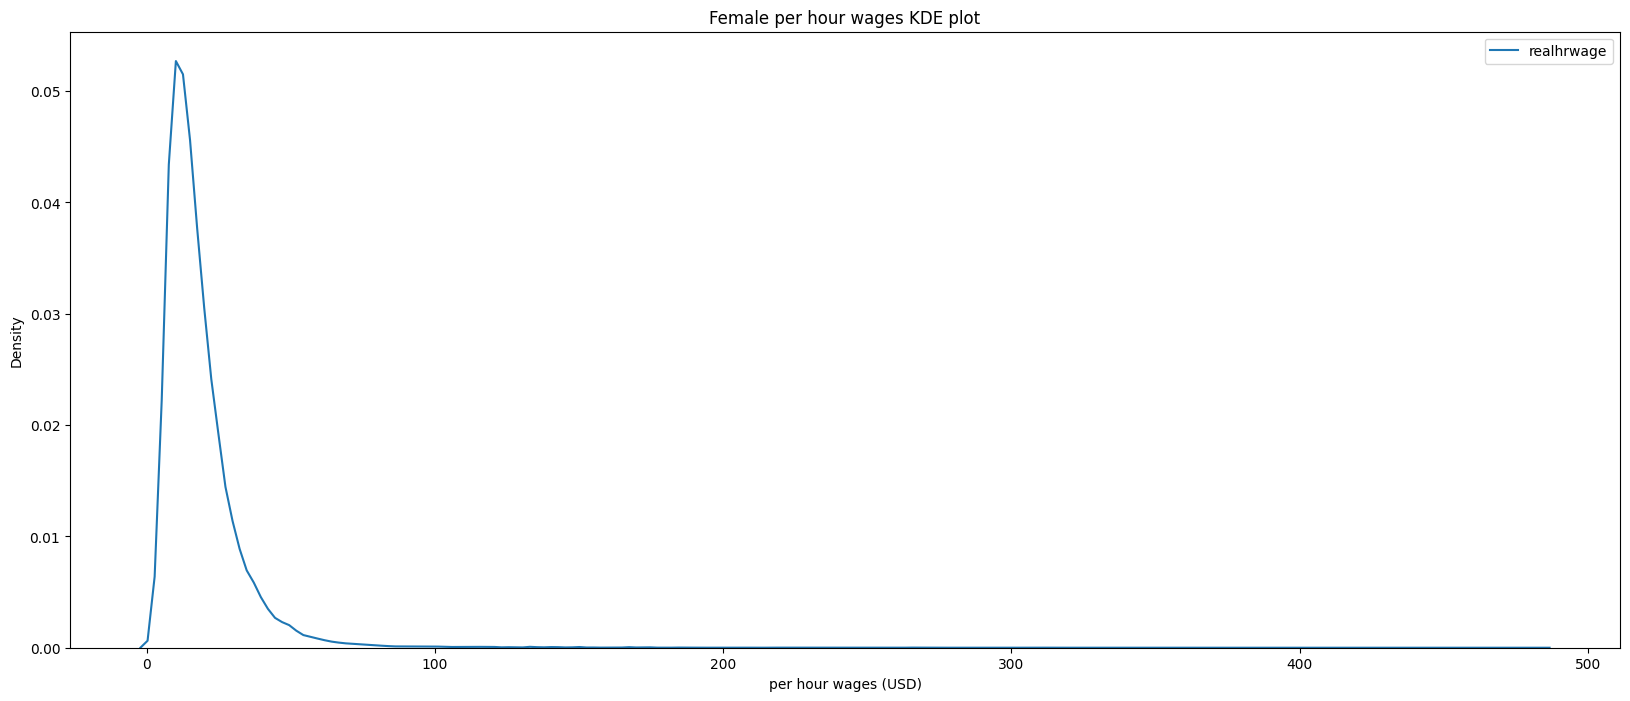

In [ ]:
plt.figure(figsize=(20, 8))
sb.kdeplot(data = female_wageonly)
plt.xlabel("per hour wages (USD)")
plt.title("Female per hour wages KDE plot")
plt.show()

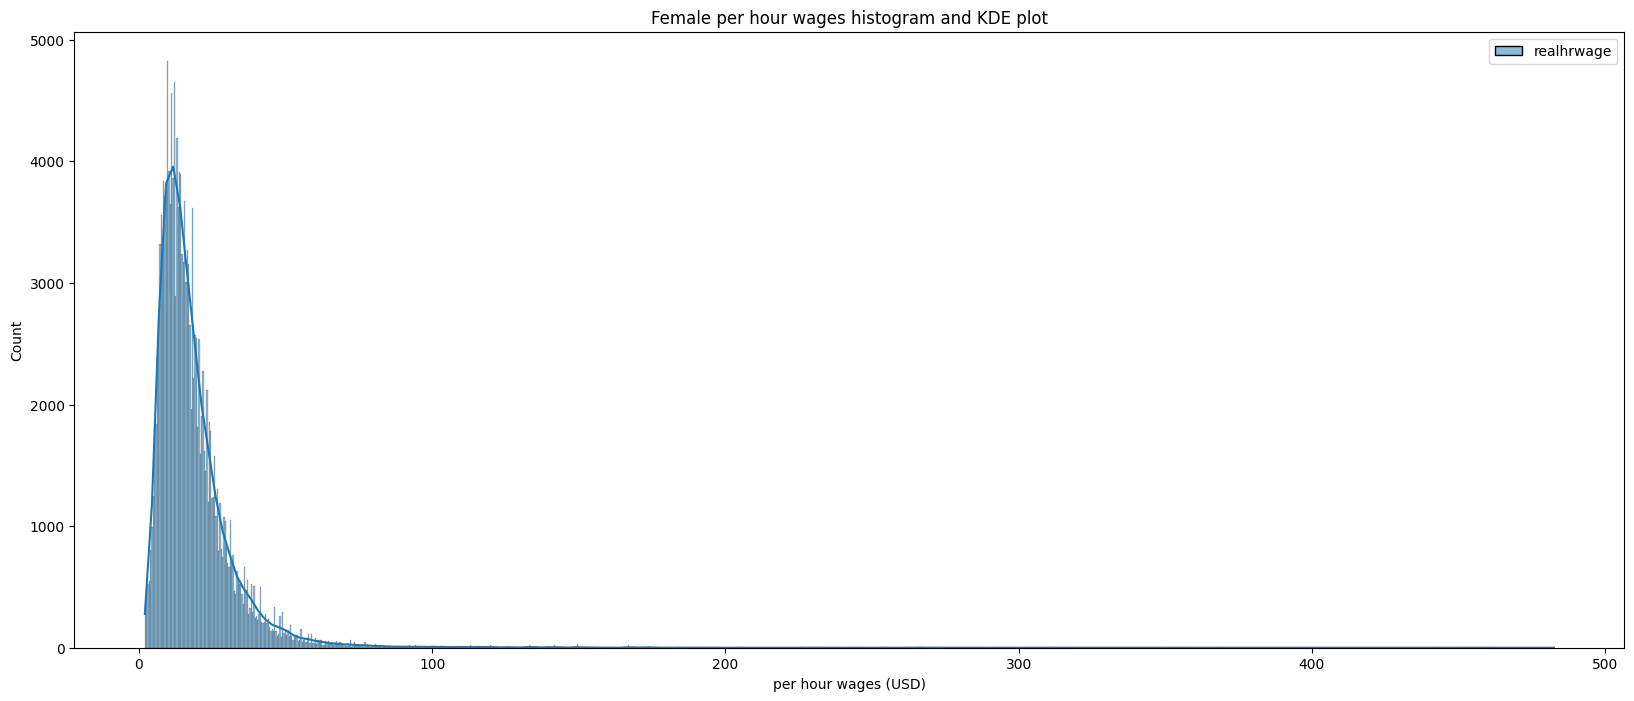

In [ ]:
plt.figure(figsize=(20, 8))
sb.histplot(data = female_wageonly, kde = True)
plt.xlabel("per hour wages (USD)")
plt.title("Female per hour wages histogram and KDE plot")
plt.show()

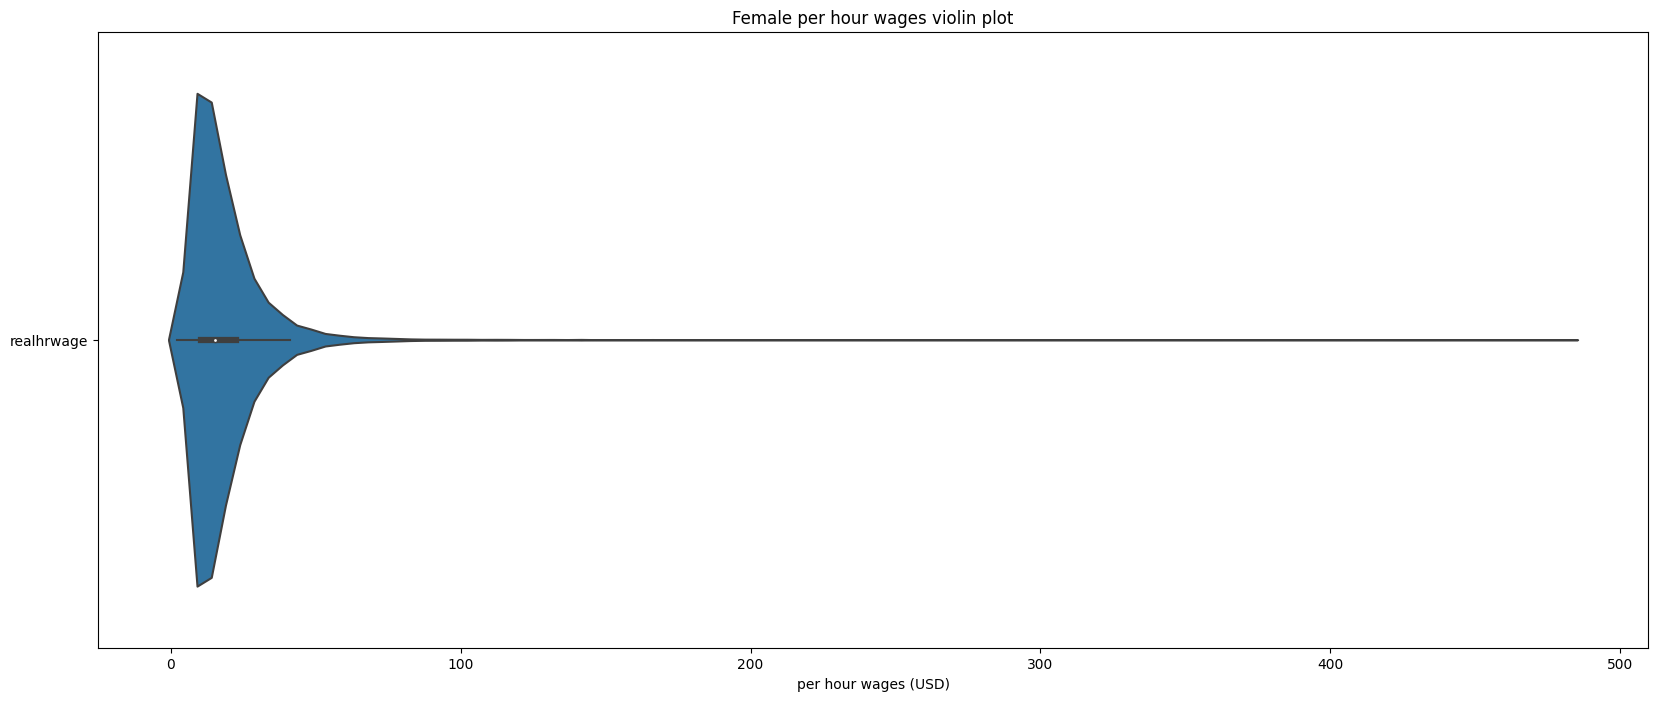

In [ ]:
plt.figure(figsize=(20, 8))
sb.violinplot(data = female_wageonly, orient = "h")
plt.xlabel("per hour wages (USD)")
plt.title("Female per hour wages violin plot")
plt.show()

## Bivariate Visualisation

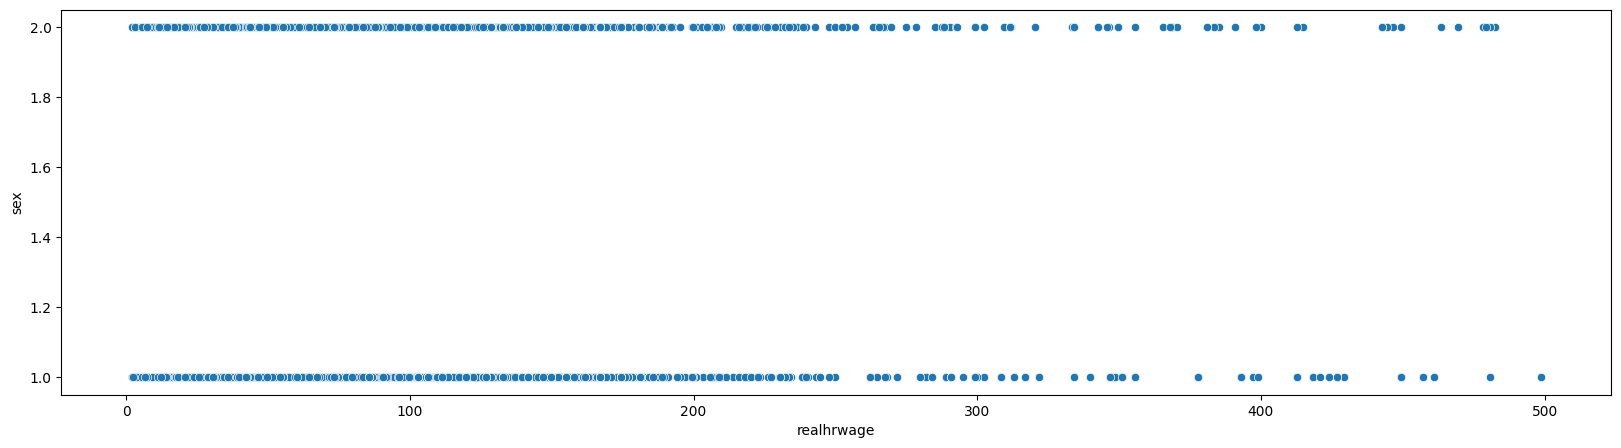

In [ ]:
plt.figure(figsize=(20, 5))
sb.scatterplot(data = gender_wage, x = "realhrwage", y = "sex")
plt.show()

In [ ]:
gender_wage.corr()

,sex,realhrwage
sex,1.000000,-0.172504
realhrwage,-0.172504,1.000000


<Axes: >

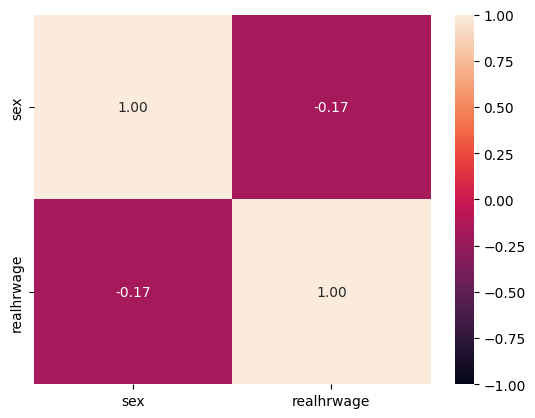

In [ ]:
sb.heatmap(gender_wage.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

## Analysing Age vs Wage Relationship

In [ ]:
age_wage.describe()

,age,realhrwage
count,344220.000000,344220.000000
mean,41.733990,21.717461
std,10.415763,17.467704
min,25.000000,2.000000
25%,33.000000,11.722334
50%,41.000000,17.692308
75%,50.000000,26.415131
max,64.000000,498.723145


### Wage Statistics for Each Age Group

In [ ]:
twenties_wage = age_wage[age_wage['age'].between(20,29)]
thirties_wage = age_wage[age_wage['age'].between(30,39)]
forties_wage = age_wage[age_wage['age'].between(40,49)]
fifties_wage = age_wage[age_wage['age'].between(50,59)]
sixties_wage = age_wage[age_wage['age'].between(60,69)]

twenties_wageonly = pd.DataFrame(twenties_wage['realhrwage'])
thirties_wageonly = pd.DataFrame(thirties_wage['realhrwage'])
forties_wageonly = pd.DataFrame(forties_wage['realhrwage'])
fifties_wageonly = pd.DataFrame(fifties_wage['realhrwage'])
sixties_wageonly = pd.DataFrame(sixties_wage['realhrwage']) #can use to_frame() method

In [ ]:
twenties_wage.describe()

,age,realhrwage
count,49927.000000,49927.000000
mean,27.040299,16.448139
std,1.410249,12.297979
min,25.000000,2.000000
25%,26.000000,10.068802
50%,27.000000,14.365255
75%,28.000000,19.977470
max,29.000000,480.788727


In [ ]:
thirties_wage.describe()

,age,realhrwage
count,105350.000000,105350.000000
mean,34.476763,20.940660
std,2.874190,15.489944
min,30.000000,2.000000
25%,32.000000,11.804261
50%,34.000000,17.569189
75%,37.000000,25.589657
max,39.000000,478.337830


In [ ]:
forties_wage.describe()

,age,realhrwage
count,99639.000000,99639.000000
mean,44.371642,23.499908
std,2.871321,18.715724
min,40.000000,2.000000
25%,42.000000,12.382092
50%,44.000000,19.194838
75%,47.000000,28.846153
max,49.000000,482.552460


In [ ]:
fifties_wage.describe()

,age,realhrwage
count,71322.000000,71322.000000
mean,54.029107,23.824324
std,2.827494,19.671845
min,50.000000,2.000000
25%,52.000000,12.482243
50%,54.000000,19.230770
75%,56.000000,28.891548
max,59.000000,498.723145


In [ ]:
sixties_wage.describe()

,age,realhrwage
count,17982.000000,17982.000000
mean,61.667000,22.665657
std,1.391658,20.559112
min,60.000000,2.000000
25%,60.000000,11.533251
50%,61.000000,17.729568
75%,63.000000,27.351151
max,64.000000,469.487640


Visualising the Relationship between Age and Wage

Visualising the Uni-Variate Distributions of RealHrWage For Each Age Group

In [ ]:
age = pd.DataFrame(age_wage['age'])
wage = pd.DataFrame(age_wage['realhrwage'])

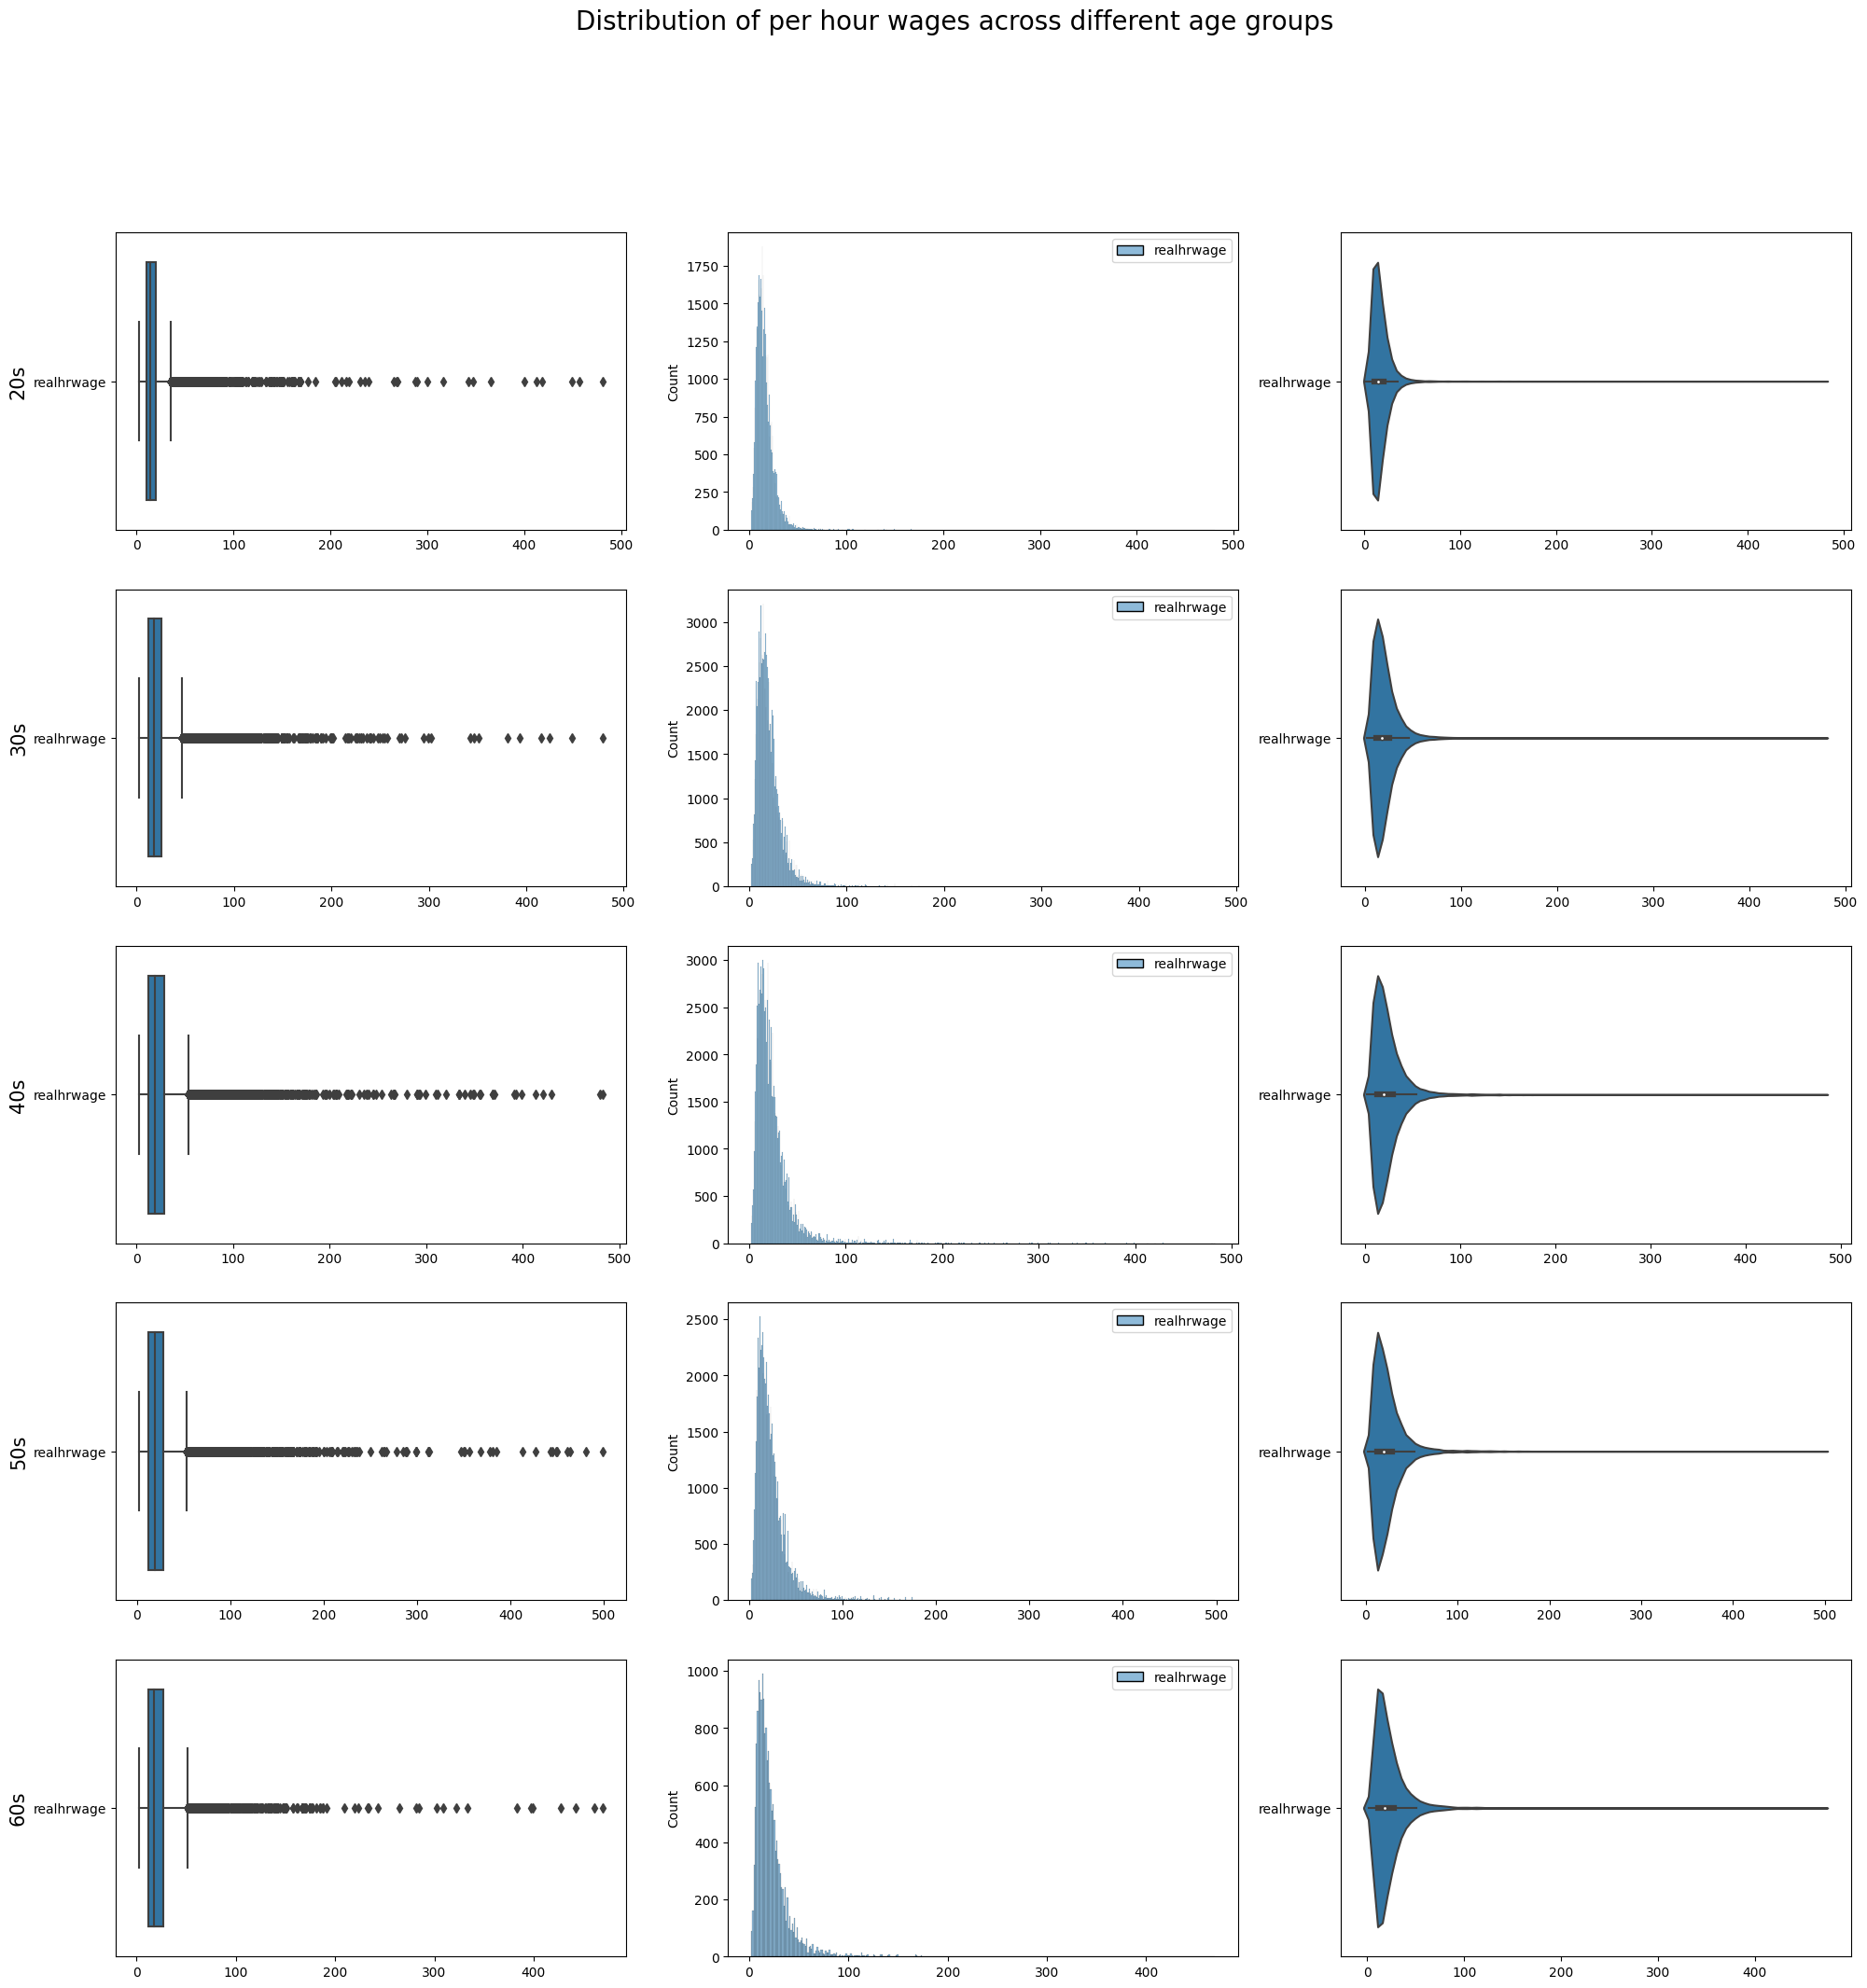

In [ ]:
f, axes = plt.subplots(5, 3, figsize=(24, 24))

#twenties
sb.boxplot(data = twenties_wageonly, orient = "h", ax = axes[0,0])
sb.histplot(data = twenties_wageonly, ax = axes[0,1])
sb.violinplot(data = twenties_wageonly, orient = "h", ax = axes[0,2])

#thirties
sb.boxplot(data = thirties_wageonly, orient = "h", ax = axes[1,0])
sb.histplot(data = thirties_wageonly, ax = axes[1,1])
sb.violinplot(data = thirties_wageonly, orient = "h", ax = axes[1,2])

#forties
sb.boxplot(data = forties_wageonly, orient = "h", ax = axes[2,0])
sb.histplot(data = forties_wageonly, ax = axes[2,1])
sb.violinplot(data = forties_wageonly, orient = "h", ax = axes[2,2])

#fifties
sb.boxplot(data = fifties_wageonly, orient = "h", ax = axes[3,0])
sb.histplot(data = fifties_wageonly, ax = axes[3,1])
sb.violinplot(data = fifties_wageonly, orient = "h", ax = axes[3,2])

#sixties
sb.boxplot(data = sixties_wageonly, orient = "h", ax = axes[4,0])
sb.histplot(data = sixties_wageonly, ax = axes[4,1])
sb.violinplot(data = sixties_wageonly, orient = "h", ax = axes[4,2])

#Set Titles
plt.suptitle("Distribution of per hour wages across different age groups", size = 20)
axes[0, 0].get_yaxis().set_label_text("20s", size=15)
axes[1, 0].get_yaxis().set_label_text("30s", size=15)
axes[2, 0].get_yaxis().set_label_text("40s", size=15)
axes[3, 0].get_yaxis().set_label_text("50s", size=15)
axes[4, 0].get_yaxis().set_label_text("60s", size=15)

plt.show()

Visualising the Bi-Variate Distributions of Age and RealHrWage Together

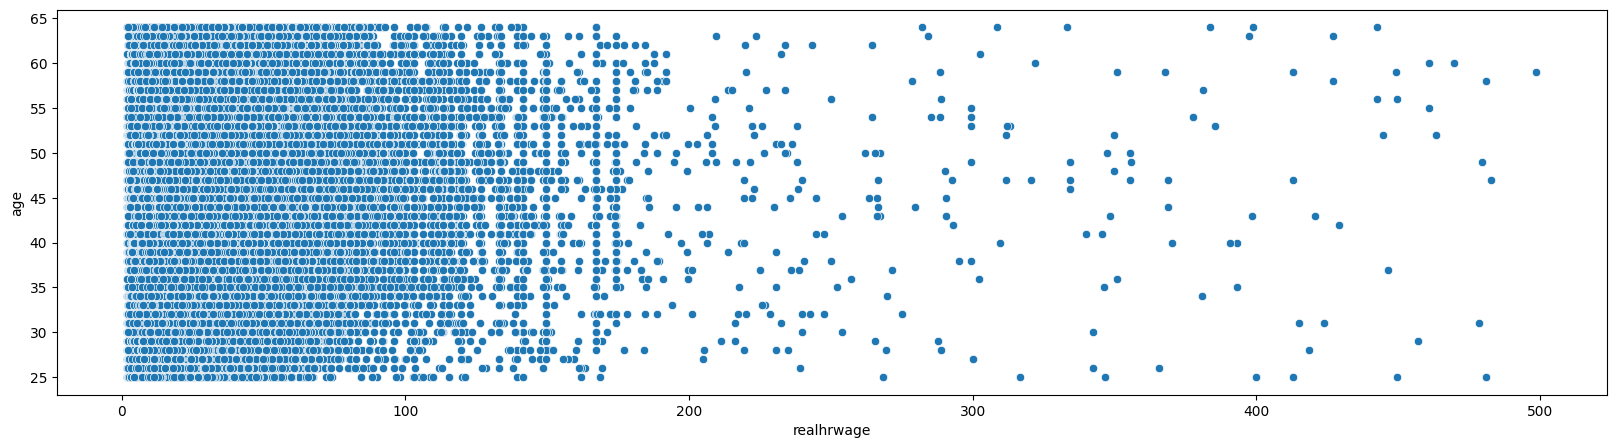

In [ ]:
plt.figure(figsize=(20, 5))
sb.scatterplot(data = age_wage, x = "realhrwage", y = "age")
plt.show()

In [ ]:
age_wage.corr()

,age,realhrwage
age,1.00000,0.12193
realhrwage,0.12193,1.00000


<Axes: >

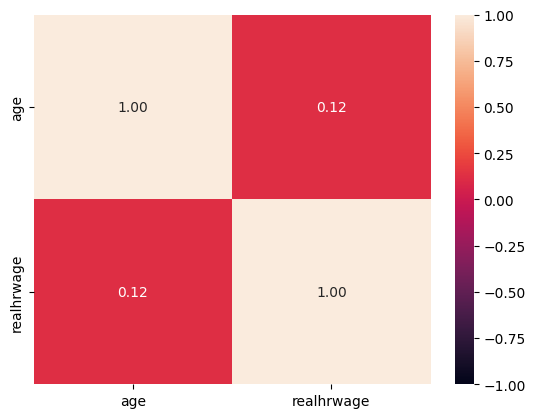

In [ ]:
sb.heatmap(age_wage.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

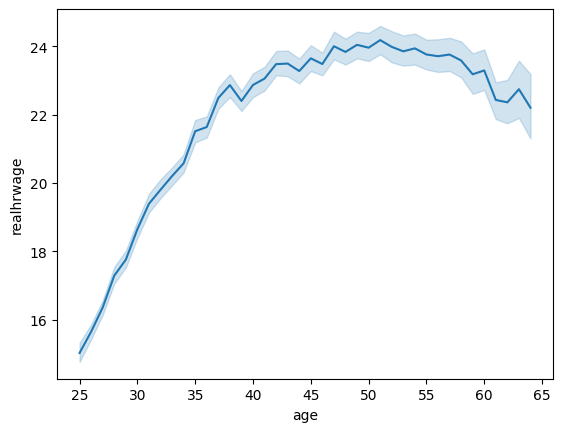

In [ ]:
sb.lineplot(data = age_wage, x = "age", y = "realhrwage")
plt.show()

## Analysing Race vs Wage Relationship

In [ ]:
white_wage = race_wage[race_wage["race"] == 1]
white_wageonly = pd.DataFrame(white_wage['realhrwage'])
black_wage = race_wage[race_wage["race"] == 2]
black_wageonly = pd.DataFrame(black_wage['realhrwage'])
hispanic_wage = race_wage[race_wage["race"] == 3]
hispanic_wageonly = pd.DataFrame(hispanic_wage['realhrwage'])
others_wage = race_wage[race_wage["race"] == 4]
others_wageonly = pd.DataFrame(others_wage['realhrwage'])

In [ ]:
white_wage.describe()

,race,realhrwage
count,240341.0,240341.000000
mean,1.0,23.016457
std,0.0,18.063566
min,1.0,2.000000
25%,1.0,12.713394
50%,1.0,18.901653
75%,1.0,27.777779
max,1.0,498.723145


In [ ]:
black_wage.describe()

,race,realhrwage
count,33077.0,33077.000000
mean,2.0,18.515240
std,0.0,14.773056
min,2.0,2.000000
25%,2.0,10.416667
50%,2.0,15.384615
75%,2.0,22.681984
max,2.0,482.552460


In [ ]:
hispanic_wage.describe()

,race,realhrwage
count,49271.0,49271.000000
mean,3.0,16.782572
std,0.0,14.064108
min,3.0,2.000000
25%,3.0,9.235454
50%,3.0,13.483904
75%,3.0,20.192308
max,3.0,479.507233


In [ ]:
others_wage.describe()

,race,realhrwage
count,21531.0,21531.000000
mean,4.0,23.429635
std,0.0,18.831758
min,4.0,2.020202
25%,4.0,12.019231
50%,4.0,18.440742
75%,4.0,29.143971
max,4.0,442.577789


Univariate Visualisation

Text(0, 0.5, 'Others')

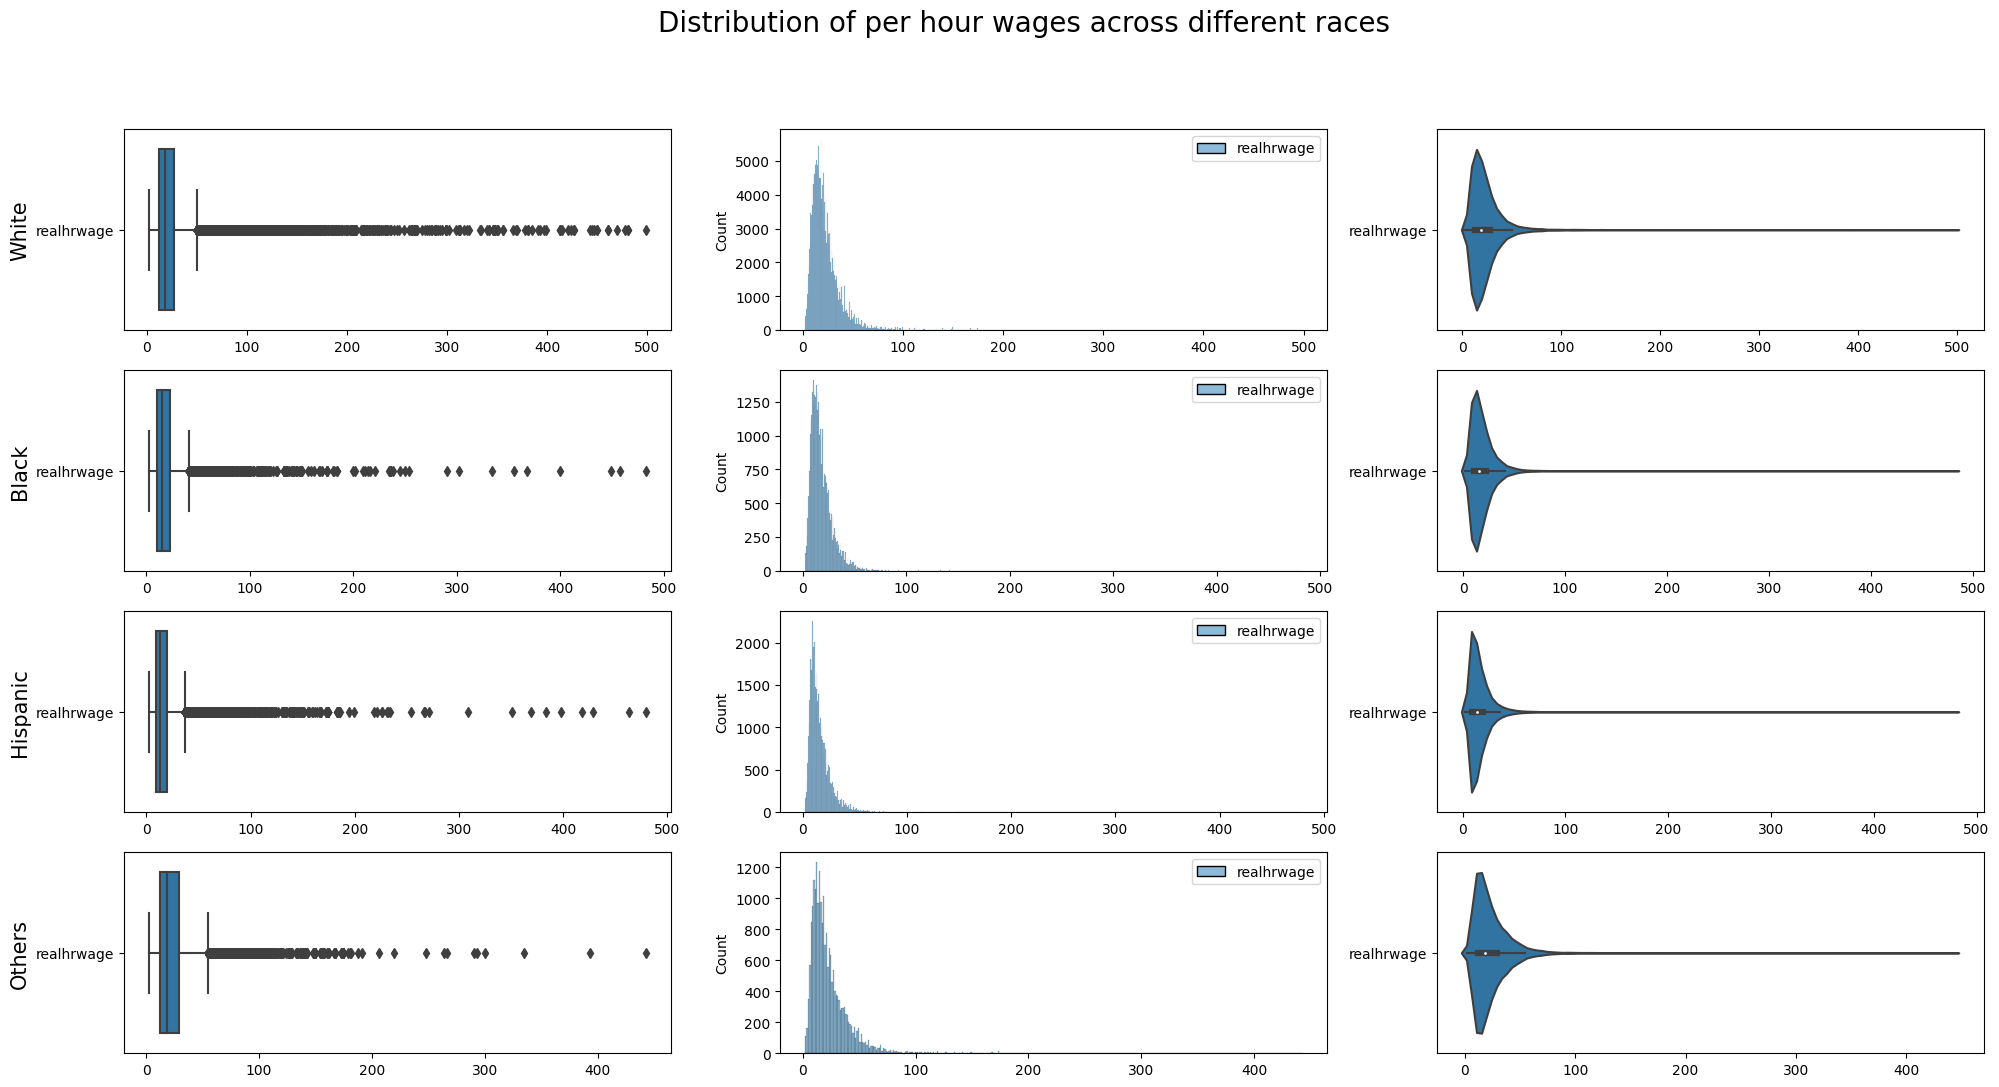

In [ ]:
f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for White Wages
sb.boxplot(data = white_wageonly, orient = "h", ax = axes[0,0])
sb.histplot(data = white_wageonly, ax = axes[0,1])
sb.violinplot(data = white_wageonly, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Black Wages
sb.boxplot(data = black_wageonly, orient = "h", ax = axes[1,0])
sb.histplot(data = black_wageonly, ax = axes[1,1])
sb.violinplot(data = black_wageonly, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for Hispanic Wages
sb.boxplot(data = hispanic_wageonly, orient = "h", ax = axes[2,0])
sb.histplot(data = hispanic_wageonly, ax = axes[2,1])
sb.violinplot(data = hispanic_wageonly, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for Others Wages
sb.boxplot(data = others_wageonly, orient = "h", ax = axes[3,0])
sb.histplot(data = others_wageonly, ax = axes[3,1])
sb.violinplot(data = others_wageonly, orient = "h", ax = axes[3,2])

plt.suptitle("Distribution of per hour wages across different races", size = 20)
axes[0, 0].get_yaxis().set_label_text("White", size=15)
axes[1, 0].get_yaxis().set_label_text("Black", size=15)
axes[2, 0].get_yaxis().set_label_text("Hispanic", size=15)
axes[3, 0].get_yaxis().set_label_text("Others", size=15)

Bivariate Visualisation

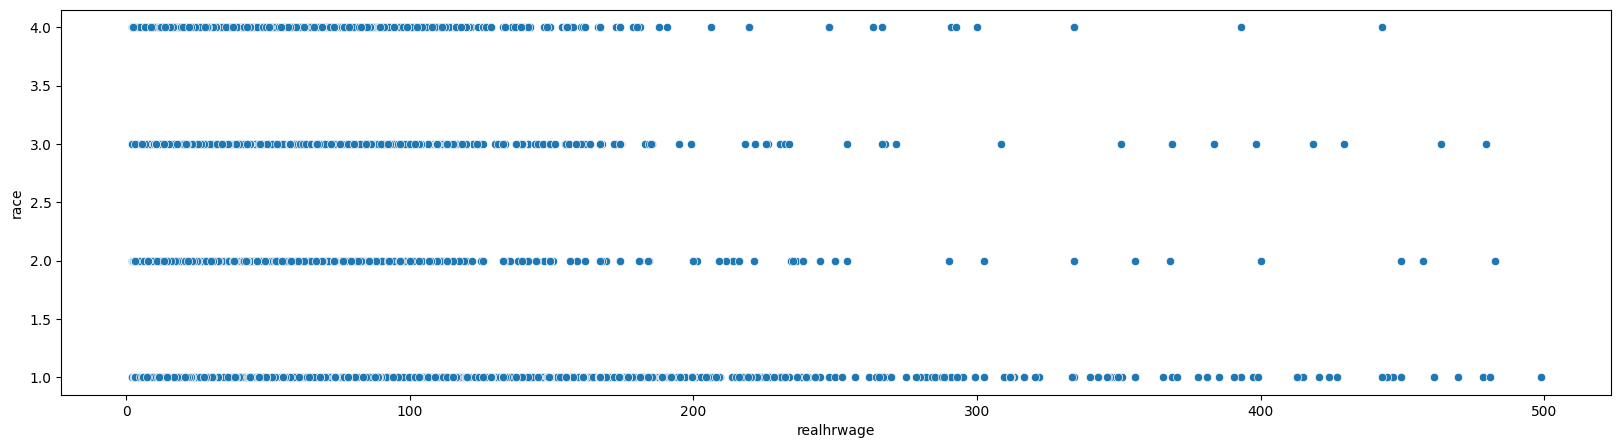

In [ ]:
plt.figure(figsize=(20, 5))
sb.scatterplot(data = race_wage, x = "realhrwage", y = "race")
plt.show()

## Classification Tree (used in exploratory)

In [ ]:
def classification_tree(df, pred, res, tree_depth = 2):

    # Extract target columns from the dataset 
    res_df = pd.DataFrame(df[res])
    pred_df = pd.DataFrame(df[pred])
    
    # Split the Legendary-Total Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(pred_df, res_df, test_size = 0.2)

    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = tree_depth)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict Legendary values corresponding to Total
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

    
    # Plot the tree
    # f1 = plt.figure(figsize = (tree_depth*8,tree_depth*8))
    # plot_tree(dectree, filled=True, rounded=False, feature_names=pred)
    
    # # Plot the Confusion Matrix for Train and Test
    # f, axes = plt.subplots(1, 2, figsize=(12, 4))
    # sb.heatmap(confusion_matrix(y_train, y_train_pred),
    #            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    # sb.heatmap(confusion_matrix(y_test, y_test_pred), 
    #            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    # plt.show()

In [ ]:
copy_df['sex'] = copy_df.sex.apply(lambda x: x-1)
classification_tree(copy_df, ["realhrwage"], ["sex"], 4)

NameError: ignored

# 3. Machine Learning
This section explores what a person's per hour wage should be if we ignore factors such as age, gender and race and look only at their experience and schooling level.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

## Data Pre-processing
Further processing of data to suit the needs to machine learning models

In [ ]:
copy_df = df.copy()

In [ ]:
#Remove bad quality variables and wage related variables
copy_df = copy_df.drop(['un_lnrealwg','lnrwg','o_incbus','qincfarm','qincbus','incbus','o_incfarm','incfarm','adj_occ2name','niincwage','incwageman','tcincwage','hrwage','uncenrealhrwage','wagesamp','incwage', 'qincwage', 'o_incwage', 'o_qincwage', 'o_qincwage','ind50ly','metro','tcoincwage','tcinclongj','occ_2010_orig','ind_2002_orig','ind_2007_orig','occ_81','ind_81','ind_2000','occ2000_81','ind2000_81','occ_1990','ind_1990','occ_1999','ind_1999','unmatched_occ_90','occ2000_90','unmatched_ind_90','ind2000_90','indname2000_90','unmatched_occ_99','occ2000_99','unmatched_ind_99','ind2000_99','indname2000_99','o_inclongj','o_oincwage','o_srcearn','o_quhrswor','o_qwkswork','o_farm','o_county','o_citizen','o_fbpl','o_educ99','o_schlcoll','qsrcearn','qinclong','oincwage', 'qwkswork','srcearn', 'inclongj', 'quhrswor','ind1990','educ99','citizen','schlcoll','county','farm','hwtsupp', 'relate', 'age', 'sex', 'race', 'marst', 'bpl', 'yrimmig', 'mbpl', 'fbpl', 'nativity', 'hispan', 'ftype', 'o_hwtsupp', 'o_relate', 'o_age', 'o_sex', 'o_race', 'o_marst', 'o_bpl', 'o_yrimmig', 'o_mbpl', 'o_bpl', 'o_nativity', 'o_hispan', 'white', 'black', 'hispan', 'origrace', 'othrace', 'hdwfcoh', 'occ_2000female', 'unmatched_fem_81', 'occ_2000male', 'unmatched_male_81','female'],axis=1)

In [ ]:
copy_df = copy_df.drop('Unnamed: 0', axis=1)

In [ ]:
copy_df['metarea'] = copy_df['metarea'].fillna(copy_df['metarea'].median())
copy_df['hrswork'] = copy_df['hrswork'].fillna(copy_df['hrswork'].median())
copy_df['metarea'] = copy_df['metarea'].fillna(copy_df['hrswork'].median())
copy_df['union'] = copy_df['union'].fillna(0)
copy_df['o_union'] = copy_df['o_union'].fillna(0)

In [ ]:
#Predict for majority of the people only
realhrwage_first = copy_df['realhrwage'].quantile(0.25)
realhrwage_third = copy_df['realhrwage'].quantile(0.75)
realhrwage_iqr = realhrwage_third - realhrwage_first #inter-quartile range

copy_df = copy_df[(copy_df['realhrwage'] >= realhrwage_first-1.5*realhrwage_iqr) & (copy_df['realhrwage'] <= realhrwage_third+1.5*realhrwage_iqr)]

## Linear Regression

In [ ]:
def linearRegression(df, X_name, y_name):
    #Extract data
    X = pd.DataFrame(df[X_name]).values
    y = pd.DataFrame(df[y_name]).values

    #Scaling input features 
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit regression model using all the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

In [ ]:
lin_reg_model = linearRegression(copy_df,copy_df.columns[copy_df.columns!='realhrwage'] , 'realhrwage')

Intercept of Regression 	: b =  [-232.42116805]
Coefficients of Regression 	: a =  [[ 1.21076054e-01 -1.51531303e-06  1.23798683e-01 -3.19763096e-12
  -3.89210160e-02 -5.33133416e-03  4.11081497e-04 -1.15953159e-11
  -4.13518213e-01 -1.58102489e-05  1.17063971e-11 -3.35770489e-01
   3.34473944e-03 -8.06462969e-12  3.33821793e-05 -3.91104598e-03
   6.00885287e-04  1.05435022e-04  2.78178196e-03  1.77206324e-02
  -1.57608446e-04 -1.62491044e-03 -6.78088975e-05  1.55257462e-02
   1.20202705e-02 -8.82675820e-02  6.08152320e-02 -7.03291214e-02
   1.51006883e-01  1.23798683e-01  2.67563749e-14 -3.89210160e-02
  -5.33133416e-03  1.67696933e-01 -3.43929004e-04 -3.10862447e-15
  -4.13518213e-01 -1.58102559e-05  1.33226763e-15  5.57017564e-02
   3.34473943e-03  6.66133815e-16  3.33821601e-05 -3.91104599e-03
  -2.38708945e-03  6.00885286e-04  1.05435017e-04  2.78178197e-03
   1.77206324e-02 -1.57608433e-04 -1.62491043e-03 -6.78089776e-05
  -2.01858582e-03  1.55257462e-02  1.20202705e-02 -8.826758

Both years of experience and years of schooling have low linear correlation with per hour wages. 

## Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def poly_regression(df, X_name, y_name, k=5):
  #Extract data
  X = pd.DataFrame(df[X_name]).values
  y = pd.DataFrame(df[y_name]).values

  #Scaling input features 
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)
  

  # Fit regression model using all the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  score=0
  index=-1
  for i in range(3,8):
    print("Degree: {}".format(i), end='')
    # Create a polynomial features object with degree=i
    poly = PolynomialFeatures(degree=i)

    # Use the polynomial features object to transform the data
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Train model 
    regr = LinearRegression()
    regr.fit(X_poly_train, y_train)


    test_score = regr.score(X_poly_test, y_test)
    if test_score > score:
        score = test_score
        index = i
    print(", Score: {}".format(test_score))

  if index == -1: return
  # Create a polynomial features object with degree=i
  poly = PolynomialFeatures(degree=index)

  # Use the polynomial features object to transform the data
  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.transform(X_test)

  # Train model 
  regr = LinearRegression()
  regr.fit(X_poly_train, y_train)

  # Predict
  y_train_pred = regr.predict(X_poly_train)
  y_test_pred = regr.predict(X_poly_test)

  # Check the Goodness of Fit (on Train Data)
  print()
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", regr.score(X_poly_train, y_train))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
  print()

  # Check the Goodness of Fit (on Test Data)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", regr.score(X_poly_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  return regr

In [ ]:
poly_reg_model = poly_regression(copy_df,copy_df.columns[copy_df.columns!='realhrwage'], 'realhrwage')

## Bayesian Ridge Regression

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
def bayesian_reg(df, X_name, y_name, k=5):
    # Extract data
    X = pd.DataFrame(df[X_name]).values
    y = pd.DataFrame(df[y_name]).values

    # Scaling input features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    index = 0
    score = -1
    for i in np.logspace(-1, 1, 10):
        print("Alpha: {}".format(i), end='')
        #Model training
        regr = BayesianRidge(alpha_1=i, alpha_2=i, lambda_1=i, lambda_2=i)
        regr.fit(X_train, y_train)
        test_score = regr.score(X_test, y_test)
        if test_score > score:
            score = test_score
            index = i
        print(", Score: {}".format(test_score))
      
    # Model training
    regr = BayesianRidge(alpha_1=index, alpha_2=index, lambda_1=index, lambda_2=index)
    regr.fit(X_train, y_train)

    # Predict
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print()
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", regr.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", regr.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    return regr

In [ ]:
bayes_model = bayesian_reg(copy_df,copy_df.columns[copy_df.columns!='realhrwage'], 'realhrwage')

Alpha: 0.1, Score: 0.3765413031663921
Alpha: 0.16681005372000587, Score: 0.37654130629633886
Alpha: 0.2782559402207124, Score: 0.3765413115029228
Alpha: 0.46415888336127786, Score: 0.37654132014794817
Alpha: 0.774263682681127, Score: 0.3765413344581853
Alpha: 1.291549665014884, Score: 0.37654135802605937
Alpha: 2.1544346900318834, Score: 0.3765413965168748
Alpha: 3.593813663804626, Score: 0.3765414585248742
Alpha: 5.994842503189409, Score: 0.37654155623505536
Alpha: 10.0, Score: 0.3765417049131856

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3806659731407783
Mean Squared Error (MSE) 	: 58.676830519562344

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3765417049131856
Mean Squared Error (MSE) 	: 59.13362259473136


## Regression Decision Tree 
Per hour wage rate a person should receive based on education and experience

In [ ]:
def regression_tree(df, X_name, y_name, k=5):
  #Extract data
  X = pd.DataFrame(df[X_name]).values
  y = pd.DataFrame(df[y_name]).values

  #Scaling input features 
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)
  

  # Fit regression model using all the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  score=0
  index=-1
  for i in range(3,15):
    print("Depth: {}".format(i), end='')
    #Model training
    regr = DecisionTreeRegressor(max_depth=i, random_state=42)
    regr.fit(X_train, y_train)
    test_score = regr.score(X_test, y_test)
    if test_score > score:
        score = test_score
        index = i
    print(", Test Score: {}".format(test_score))

  if index == -1: return

  regr = DecisionTreeRegressor(max_depth=index, random_state=42)
  regr.fit(X_train, y_train)

  # Predict
  y_train_pred = regr.predict(X_train)
  y_test_pred = regr.predict(X_test)

  # Check the Goodness of Fit (on Train Data)
  print()
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", regr.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
  print()

  # Check the Goodness of Fit (on Test Data)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", regr.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  return regr


In [ ]:
reg_tree_model = regression_tree(copy_df, copy_df.columns[copy_df.columns!='realhrwage'], 'realhrwage')

Depth: 3, Test Score: 0.23264227315995845
Depth: 4, Test Score: 0.26804781209125816
Depth: 5, Test Score: 0.2983437019014772
Depth: 6, Test Score: 0.32414010517199265
Depth: 7, Test Score: 0.34216800805167
Depth: 8, Test Score: 0.3562497708649036
Depth: 9, Test Score: 0.36481630464080483
Depth: 10, Test Score: 0.3725370135985566
Depth: 11, Test Score: 0.37388473922225474
Depth: 12, Test Score: 0.367691131563989
Depth: 13, Test Score: 0.35599243833733585
Depth: 14, Test Score: 0.33929822758312544

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4355431626452988
Mean Squared Error (MSE) 	: 53.477665919683865

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.37388473922225474
Mean Squared Error (MSE) 	: 59.38562983828368


## Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
def rand_forest(df, X_name, y_name, k=5):
  #Extract data
  X = pd.DataFrame(df[X_name]).values
  y = pd.DataFrame(df[y_name]).values

  #Scaling input features 
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)


  #Train-Test Split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  y_train = y_train.ravel()
  y_test = y_test.ravel()

  score=0
  index=-1
  for i in range(5,18):
    print("Depth: {}".format(i), end='')
    #Model training
    regr = RandomForestRegressor(max_depth=i, random_state=42)
    regr.fit(X_train, y_train)
    test_score = regr.score(X_test, y_test)
    if test_score > score:
        score = test_score
        index = i
    print(", Score: {}".format(test_score))

  if index == -1: return
  regr = RandomForestRegressor(max_depth=index, random_state=42)
  regr.fit(X_train, y_train)

  # Predict
  y_train_pred = regr.predict(X_train)
  y_test_pred = regr.predict(X_test)

  # Check the Goodness of Fit (on Train Data)
  print()
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", regr.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
  print()

  # Check the Goodness of Fit (on Test Data)
  print("Goodness of Fit of Model \tTest Dataset")
  print("Explained Variance (R^2) \t:", regr.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  return regr


In [ ]:
rand_forest_model = rand_forest(copy_df, copy_df.columns[copy_df.columns!='realhrwage'], 'realhrwage')

Depth: 5, Score: 0.32382890342309123
Depth: 6, Score: 0.3490134757276345
Depth: 7, Score: 0.36887330068862456
Depth: 8, Score: 0.3867100203149514
Depth: 9, Score: 0.40239260624363626
